In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"/home/albert/Work/git/cmclimate")
import cmclimate
import os
%matplotlib inline
matplotlib.rcParams['figure.figsize']= (20, 8)
matplotlib.rcParams['xtick.labelsize']= 14
matplotlib.rcParams['ytick.labelsize']= 14
matplotlib.rcParams['axes.labelsize']= 16
import sys
sys.path.insert(0,"/home/albert/lib/python")
import numpy as np
import xarray as xr
import GriddedData
import time
import numpy.ma as ma


In [2]:
ds_hgradT_JFM=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_JFM_hgradT_filt10km_bin1x1.nc')
ds_hgradS_JFM=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_JFM_hgradS_filt10km_bin1x1.nc')
ds_hgradb_JFM=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_JFM_hgradb_filt10km_bin1x1.nc')


In [3]:
ds_hgradT_JAS=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_JAS_hgradT_filt10km_bin1x1.nc')
ds_hgradS_JAS=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_JAS_hgradS_filt10km_bin1x1.nc')
ds_hgradb_JAS=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_JAS_hgradb_filt10km_bin1x1.nc')


In [4]:
hgradT_JFM=ds_hgradT_JFM['vohgradb']
hgradS_JFM=ds_hgradS_JFM['vohgradb']
hgradb_JFM=ds_hgradb_JFM['vohgradb']


In [5]:
hgradT_JAS=ds_hgradT_JAS['vohgradb']
hgradS_JAS=ds_hgradS_JAS['vohgradb']
hgradb_JAS=ds_hgradb_JAS['vohgradb']


In [6]:
def add_map(lon_min=-180, lon_max=180, lat_min=-90, lat_max=90,
            central_longitude=0., scale='auto', ax=None):
    """
    Add the map to the existing plot using cartopy

    Parameters
    ----------
    lon_min : float, optional
        Western boundary, default is -180
    lon_max : float, optional
        Eastern boundary, default is 180
    lat_min : float, optional
        Southern boundary, default is -90
    lat_max : float, optional
        Northern boundary, default is 90
    central_longitude : float, optional
        Central longitude, default is 180
    scale : {‘auto’, ‘coarse’, ‘low’, ‘intermediate’, ‘high, ‘full’}, optional
        The map scale, default is 'auto'
    ax : GeoAxes, optional
        A new GeoAxes will be created if None

    Returns
    -------
    ax : GeoAxes
    Return the current GeoAxes instance
    """
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    extent = (lon_min, lon_max, lat_min, lat_max)
    if ax is None:
        ax = plt.subplot(1, 1, 1,
                         projection=ccrs.PlateCarree(
	                                       central_longitude=central_longitude))
    ax.set_extent(extent)
    land = cfeature.GSHHSFeature(scale=scale,
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
    ax.add_feature(land)
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

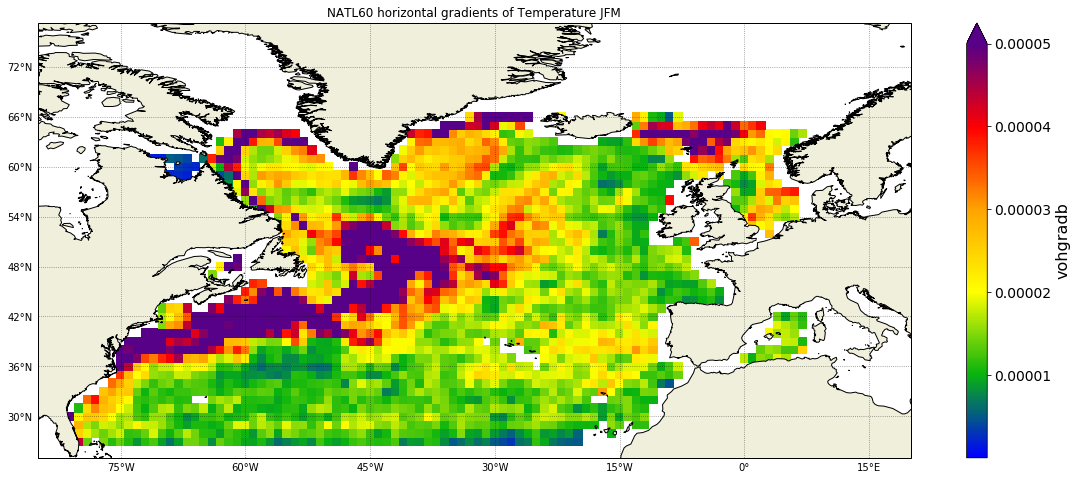

In [7]:
add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
ds_hgradT_JFM['vohgradb'].plot.pcolormesh(cmap=cmclimate.cm.BlGrYeOrReVi200, vmin=1e-9, vmax=5e-5)
plt.title('NATL60 horizontal gradients of Temperature JFM')
plt.savefig('NATL60_TSG_T_gradients_JFM_1x1.png', dpi=300, bbox_inches='tight')

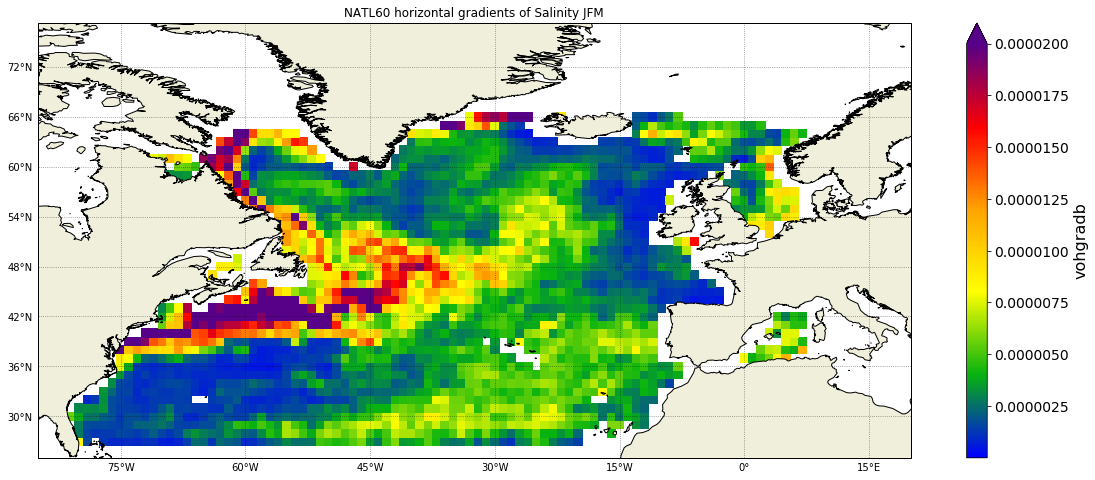

In [8]:
add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
hgradS_JFM=ds_hgradS_JFM['vohgradb']
hgradS_JFM.plot.pcolormesh(cmap=cmclimate.cm.BlGrYeOrReVi200, vmin=1e-9, vmax=2e-5)
plt.title('NATL60 horizontal gradients of Salinity JFM')
plt.savefig('NATL60_TSG_S_gradients_JFM_1x1.png', dpi=300, bbox_inches='tight')

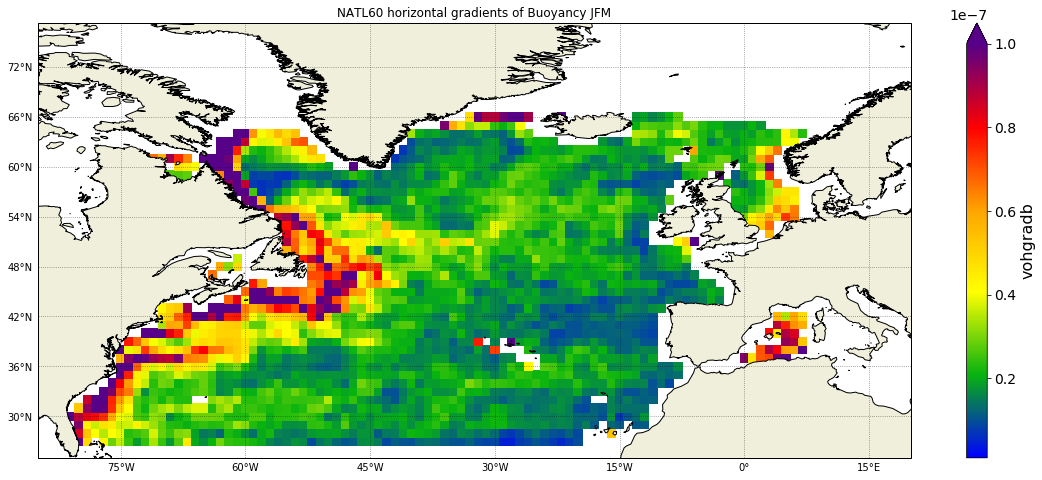

In [9]:
add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
hgradb_JFM=ds_hgradb_JFM['vohgradb']
hgradb_JFM.plot.pcolormesh(cmap=cmclimate.cm.BlGrYeOrReVi200, vmin=1e-9, vmax=1e-7)
plt.title('NATL60 horizontal gradients of Buoyancy JFM')
plt.savefig('NATL60_TSG_buoy_gradients_JFM_1x1.png', dpi=300, bbox_inches='tight')

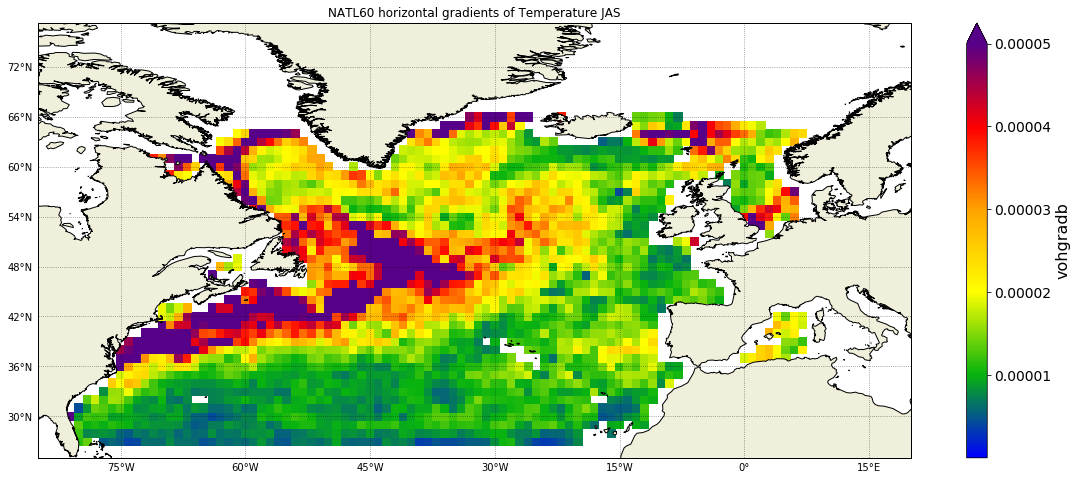

In [10]:
add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
hgradT_JAS=ds_hgradT_JAS['vohgradb']
hgradT_JAS.plot.pcolormesh(cmap=cmclimate.cm.BlGrYeOrReVi200, vmin=1e-9, vmax=5e-5)
plt.title('NATL60 horizontal gradients of Temperature JAS')
plt.savefig('NATL60_TSG_T_gradients_JAS_1x1.png', dpi=300, bbox_inches='tight')

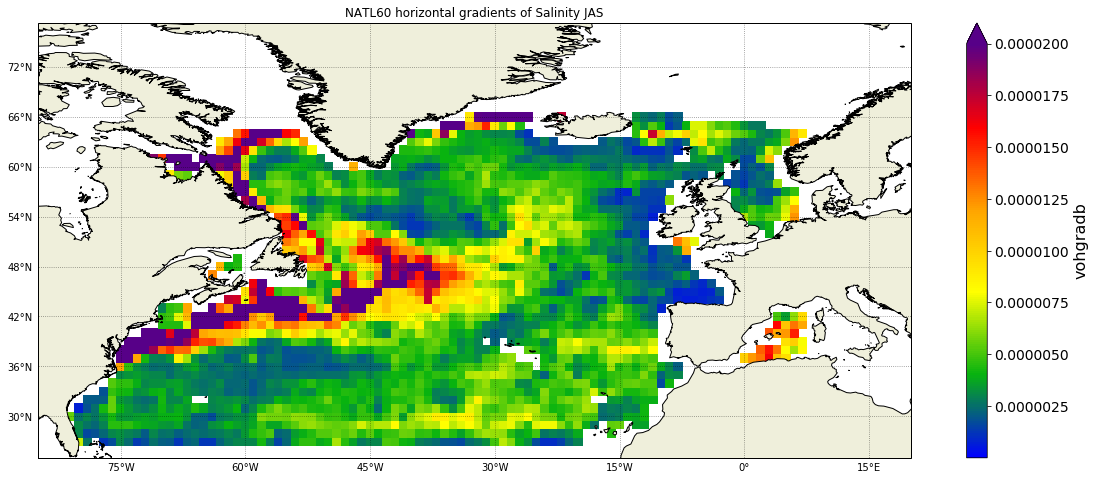

In [11]:
add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
hgradS_JAS=ds_hgradS_JAS['vohgradb']
hgradS_JAS.plot.pcolormesh(cmap=cmclimate.cm.BlGrYeOrReVi200, vmin=1e-9, vmax=2e-5)
plt.title('NATL60 horizontal gradients of Salinity JAS')
plt.savefig('NATL60_TSG_S_gradients_JAS_1x1.png', dpi=300, bbox_inches='tight')

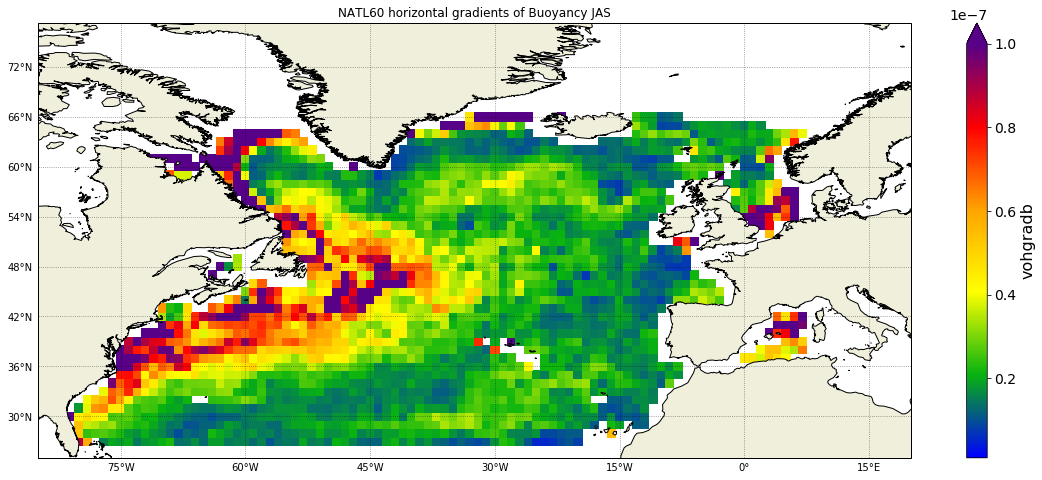

In [12]:
add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
hgradb_JAS=ds_hgradb_JAS['vohgradb']
hgradb_JAS.plot.pcolormesh(cmap=cmclimate.cm.BlGrYeOrReVi200, vmin=1e-9, vmax=1e-7)
plt.title('NATL60 horizontal gradients of Buoyancy JAS')
plt.savefig('NATL60_TSG_buoy_gradients_JAS_1x1.png', dpi=300, bbox_inches='tight')

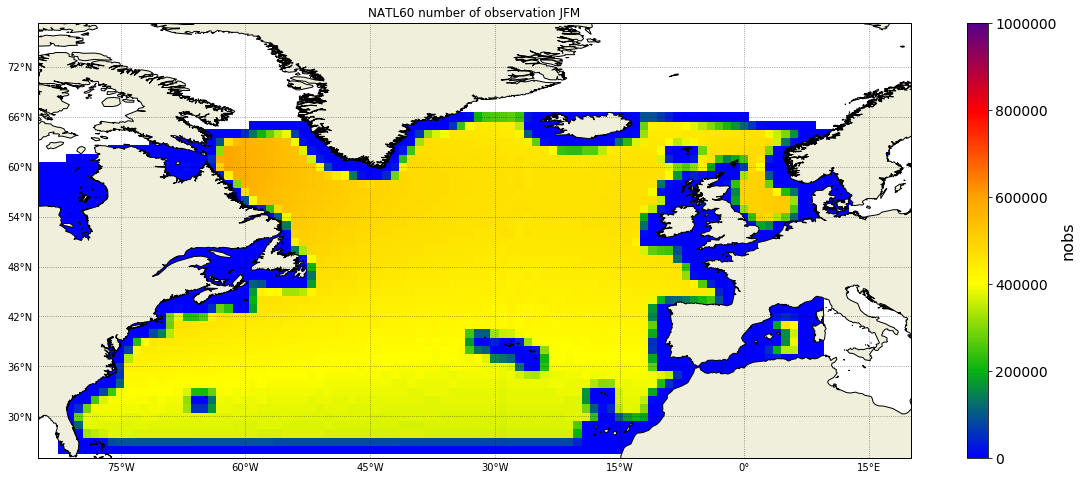

In [13]:
add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
ds_hgradT_JFM['nobs'].plot.pcolormesh(cmap=cmclimate.cm.BlGrYeOrReVi200, vmin=0, vmax=1e6)
plt.title('NATL60 number of observation JFM')
plt.savefig('NATL60_nobs_JFM_1x1.png', dpi=300, bbox_inches='tight')

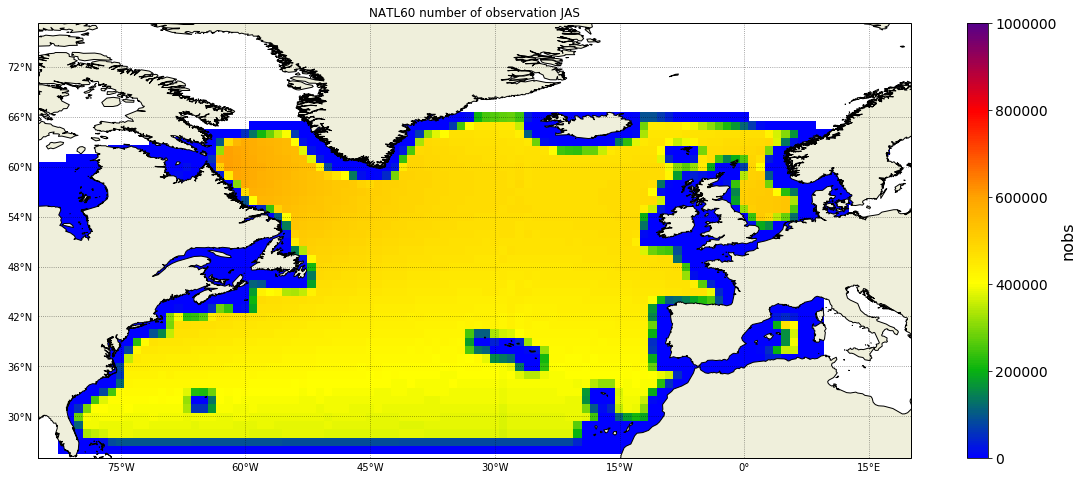

In [14]:
add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
ds_hgradT_JAS['nobs'].plot.pcolormesh(cmap=cmclimate.cm.BlGrYeOrReVi200, vmin=0, vmax=1e6)
plt.title('NATL60 number of observation JAS')
plt.savefig('NATL60_nobs_JAS_1x1.png', dpi=300, bbox_inches='tight')

In [15]:
!montage NATL60_TSG_T_gradients_JFM_1x1.png Fig_2b-NATL_TSG_temperature_gradients_JFM_1x1.png NATL60_TSG_S_gradients_JFM_1x1.png Fig_2c-NATL_TSG_salinity_gradients_JFM_1x1.png NATL60_TSG_buoy_gradients_JFM_1x1.png Fig_2a-NATL_TSG_buoyancy_gradients_JFM_1x1.png -geometry 2048x1024 -tile 2x3 -quality 100 TSG_JFM_data-NATL60.png
!convert TSG_JFM_data-NATL60.png -trim -bordercolor White -border 20x10 +repage TSG_JFM_data-NATL60.png

In [16]:
!montage NATL60_TSG_T_gradients_JAS_1x1.png Fig_3b-NATL_TSG_temperature_gradients_JAS_1x1.png NATL60_TSG_S_gradients_JAS_1x1.png Fig_3c-NATL_TSG_salinity_gradients_JAS_1x1.png NATL60_TSG_buoy_gradients_JAS_1x1.png Fig_3a-NATL_TSG_buoyancy_gradients_JAS_1x1.png  -geometry 2048x1024 -tile 2x3 -quality 100 TSG_JAS_data-NATL60.png
!convert TSG_JAS_data-NATL60.png -trim -bordercolor White -border 20x10 +repage TSG_JAS_data-NATL60.png